In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('seaborn-dark')

### Read in emissions/disclosure data provided by CDP

In [78]:
ls ../data

2013_-_Global_500_Emissions_and_Response_Status.csv
board_data.h5
company_SEC_disclosure.csv
ghgp_data_by_year_8_5_17.xlsx*
tickers.csv
tickers.xlsx*
us_emissions.h5


In [79]:
emissions = pd.read_csv('../data/2013_-_Global_500_Emissions_and_Response_Status.csv')

In [80]:
emissions.head()

,Company Name,Account Number,Country,Reporting Year,Ticker Symbol,ISIN,Disclosure Score,Performance Band,Parent Account,Permission,Response Status,Scope 1 (metric tonnes CO2e),Scope 2 (metric tonnes CO2e),Country Location
0,3M Company,285,USA,2013,MMM US,US88579Y1010,70.0,D,NaN,Public,AQ*,4540000.0,2230000.0,"(37.09024, -95.712891)"
1,ABB,282,Switzerland,2013,ABBN VX,CH0012221716,82.0,B,NaN,Public,AQ*,819000.0,857000.0,"(46.818188, 8.227512)"
2,Abbott Laboratories,64,USA,2013,ABT US,US0028241000,84.0,B,NaN,Public,AQ*,470781.0,537821.0,"(37.09024, -95.712891)"
3,Accenture,21318,Ireland,2013,ACN US,IE00B4BNMY34,92.0,B,NaN,Public,AQ*,9383.0,224615.0,"(53.41291, -8.24389)"
4,Ace Ltd.,21320,Switzerland,2013,ACE US,CH0044328745,93.0,A,NaN,Public,AQ*,12912.0,39791.0,"(46.818188, 8.227512)"


Rename some of the columns, and only extract the columns that we want:

In [81]:
emissions['Scope 1'] = emissions['Scope 1 (metric tonnes CO2e)']
emissions['Scope 2'] = emissions['Scope 2 (metric tonnes CO2e)']
emissions['Company'] = emissions['Company Name ']
emissions['Country'] = emissions['Country ']
emissions['Ticker Symbol'] = emissions['Ticker Symbol ']


emissions = emissions[['Company', 'Country', 'Disclosure Score', 'Performance Band',
                       'Scope 1', 'Scope 2', 'Ticker Symbol']]

In [82]:
emissions.head()

,Company,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol
0,3M Company,USA,70.0,D,4540000.0,2230000.0,MMM US
1,ABB,Switzerland,82.0,B,819000.0,857000.0,ABBN VX
2,Abbott Laboratories,USA,84.0,B,470781.0,537821.0,ABT US
3,Accenture,Ireland,92.0,B,9383.0,224615.0,ACN US
4,Ace Ltd.,Switzerland,93.0,A,12912.0,39791.0,ACE US


In [83]:
emissions.describe()

,Disclosure Score,Scope 1,Scope 2
count,391.000000,3.390000e+02,3.390000e+02
mean,81.427110,8.603685e+06,1.504191e+06
std,18.053032,2.598386e+07,2.718645e+06
min,2.000000,4.147000e+01,1.220000e+02
25%,74.000000,3.832100e+04,1.669390e+05
50%,86.000000,3.362580e+05,4.431650e+05
75%,94.000000,2.763000e+06,1.514495e+06
max,100.000000,1.816900e+08,2.000000e+07


Let's only look at the US

In [84]:
us_emissions = emissions[emissions['Country'] == 'USA']
us_emissions = us_emissions[us_emissions['Disclosure Score'].notnull()]

In [85]:
us_emissions['Company_clean'] = us_emissions['Company'].str.lower()
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace('[^\w\s]','')
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" incorporated", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" company", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" corporation", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" inc", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" ltd", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" corp", "")




In [86]:
us_emissions

,Company,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean
0,3M Company,USA,70.0,D,4.540000e+06,2230000.00,MMM US,3m
2,Abbott Laboratories,USA,84.0,B,4.707810e+05,537821.00,ABT US,abbott laboratories
6,"Adobe Systems, Inc.",USA,97.0,A,2.744000e+03,22995.00,ADBE US,adobe systems
8,AFLAC Incorporated,USA,85.0,B,3.884000e+03,18536.00,AFL US,aflac
11,"Air Products & Chemicals, Inc.",USA,99.0,B,1.476721e+07,10563030.00,APD US,air products chemicals
15,"Allergan, Inc.",USA,91.0,B,4.912800e+04,52049.00,AGN US,allergan
17,Allstate Corporation,USA,96.0,B,4.079600e+04,150401.00,ALL US,allstate
18,"Altria Group, Inc.",USA,75.0,C,2.839260e+05,236169.00,MO US,altria group
22,"American Electric Power Company, Inc.",USA,68.0,D,1.219274e+08,NaN,AEP US,american electric power
23,American Express,USA,87.0,C,2.337100e+04,142667.00,AXP US,american express


In [87]:
us_emissions.to_hdf('../data/us_emissions.h5', 'us_emissions')

/Users/kjbilton/Installs/miniconda2/envs/evvaru/lib/python3.6/site-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['Company', 'Country', 'Performance Band', 'Ticker Symbol', 'Company_clean']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


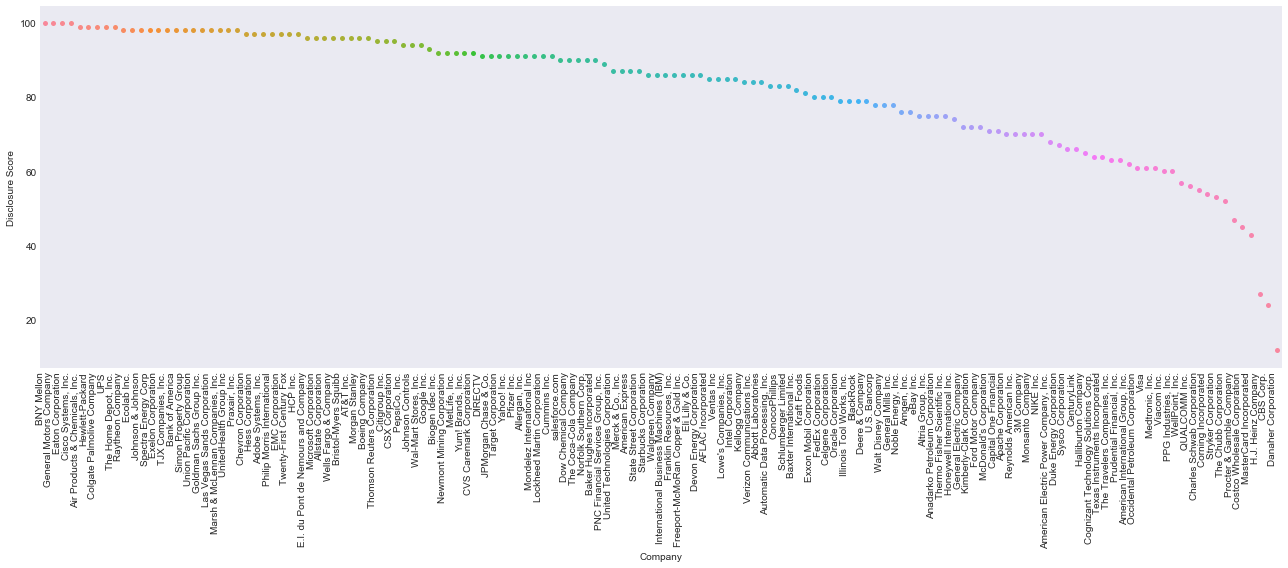

In [89]:
f, ax = plt.subplots(figsize=(18,8))
sns.stripplot(x="Company", y="Disclosure Score",
              data=us_emissions.sort_values(by='Disclosure Score',ascending=False), ax=ax)
f.autofmt_xdate(rotation=90);
plt.tight_layout()

Let's load in stock data to find out the sector for each of these companies. From there, we can group by industries to give a fair comparison:

In [79]:
!ls ../data

2013_-_Global_500_Emissions_and_Response_Status.csv
ghgp_data_by_year_8_5_17.xlsx
tickers.csv
tickers.xlsx


In [80]:
tickers = pd.read_csv('../data/tickers.csv', encoding = "ISO-8859-1")

In [81]:
tickers.head()

,Ticker,Name,Exchange,Category Name,Country
0,OEDV,"Osage Exploration and Development, Inc.",PNK,NaN,USA
1,AAPL,Apple Inc.,NMS,Electronic Equipment,USA
2,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA
3,AMZN,"Amazon.com, Inc.",NMS,Catalog & Mail Order Houses,USA
4,T,AT&T Inc.,NYQ,Telecom Services - Domestic,USA


Let's compare these ticker names to what we see in the emissions file:

In [82]:
emissions.head()

,Company,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol
0,3M Company,USA,70.0,D,4540000.0,2230000.0,MMM US
1,ABB,Switzerland,82.0,B,819000.0,857000.0,ABBN VX
2,Abbott Laboratories,USA,84.0,B,470781.0,537821.0,ABT US
3,Accenture,Ireland,92.0,B,9383.0,224615.0,ACN US
4,Ace Ltd.,Switzerland,93.0,A,12912.0,39791.0,ACE US


In [34]:
tickers[tickers['Ticker'] == 'MMM']

,Ticker,Name,Exchange,Category Name,Country
3837,MMM,3M Company,NYQ,Diversified Machinery,USA


In [83]:
tickers = tickers.rename(index=str, columns={'Name' : 'Company'})

In [88]:
tickers['Company'] = tickers['Company'].apply(lambda x: str(x).lower())
us_emissions['Company'] = us_emissions['Company'].apply(lambda x: str(x).lower())

In [90]:
tickers['Company'].head()

0    osage exploration and development, inc.
1                                 apple inc.
2                bank of america corporation
3                           amazon.com, inc.
4                                  at&t inc.
Name: Company, dtype: object

In [91]:
us_emissions['Company'].head()

0                         3m company
2                abbott laboratories
6                adobe systems, inc.
8                 aflac incorporated
11    air products & chemicals, inc.
Name: Company, dtype: object

### Check out company SEC data

In [66]:
sec = pd.read_csv('../data/company_SEC_disclosure.csv', encoding = "ISO-8859-1", header=None)

In [67]:
sec.head(10)

,0,1,2,3,4,5,6,7
0,NaN,3M CO,MMM,Medical Equipment Manufacturing,31-Dec-16,Climate Risk,S&P 500,View Report
1,Add,ABBOTT LABORATORIES,ABT,Pharmaceuticals/Health Care,31-Dec-16,Climate Risk,S&P 500,View Report
2,Add,ABBVIE INC.,ABBV,Pharmaceuticals/Health Care,31-Dec-16,Climate Risk,S&P 500,NoÊdisclosure
3,Add,ACCENTURE PLC,ACN,Services - Business-Related,31-Aug-17,Climate Risk,S&P 500,View Report
4,Add,"ACTIVISION BLIZZARD, INC.",ATVI,Information Technology,31-Dec-16,Climate Risk,S&P 500,NoÊdisclosure
5,Add,ACUITY BRANDS INC,AYI,Electronics,31-Aug-17,Climate Risk,S&P 500,View Report
6,Add,ADOBE SYSTEMS INC,ADBE,Information Technology,2-Dec-16,Climate Risk,S&P 500,View Report
7,Add,ADVANCE AUTO PARTS INC,AAP,Retail,31-Dec-16,Climate Risk,S&P 500,View Report
8,Add,ADVANCED MICRO DEVICES INC,AMD,Electronics,31-Dec-16,Climate Risk,S&P 500,NoÊdisclosure
9,Add,AES CORP,AES,Electric Power & Gas Utilities,31-Dec-16,Climate Risk,S&P 500,View Report


In [68]:
sec = sec.drop(columns=[0, 2, 4, 5, 6])

In [69]:
sec.head(10)

,1,3,7
0,3M CO,Medical Equipment Manufacturing,View Report
1,ABBOTT LABORATORIES,Pharmaceuticals/Health Care,View Report
2,ABBVIE INC.,Pharmaceuticals/Health Care,NoÊdisclosure
3,ACCENTURE PLC,Services - Business-Related,View Report
4,"ACTIVISION BLIZZARD, INC.",Information Technology,NoÊdisclosure
5,ACUITY BRANDS INC,Electronics,View Report
6,ADOBE SYSTEMS INC,Information Technology,View Report
7,ADVANCE AUTO PARTS INC,Retail,View Report
8,ADVANCED MICRO DEVICES INC,Electronics,NoÊdisclosure
9,AES CORP,Electric Power & Gas Utilities,View Report


In [70]:
sec.columns = ['Company', 'Sector', 'Disclosed']

In [71]:
sec.head()

,Company,Sector,Disclosed
0,3M CO,Medical Equipment Manufacturing,View Report
1,ABBOTT LABORATORIES,Pharmaceuticals/Health Care,View Report
2,ABBVIE INC.,Pharmaceuticals/Health Care,NoÊdisclosure
3,ACCENTURE PLC,Services - Business-Related,View Report
4,"ACTIVISION BLIZZARD, INC.",Information Technology,NoÊdisclosure


In [72]:
sec['Company_clean'] = sec['Company'].str.lower()
sec['Company_clean'] = sec['Company_clean'].str.replace('[^\w\s]','')
sec['Company_clean'] = sec['Company_clean'].str.replace(" incorporated", "")
sec['Company_clean'] = sec['Company_clean'].str.replace(" inc", "")
sec['Company_clean'] = sec['Company_clean'].str.replace(" corporation", "")
sec['Company_clean'] = sec['Company_clean'].str.replace(" corp", "")
sec['Company_clean'] = sec['Company_clean'].str.replace(" company", "")
sec['Company_clean'] = sec['Company_clean'].str.replace(" ltd$", "")
sec['Company_clean'] = sec['Company_clean'].str.replace(" co$", "")
sec['Company_clean'] = sec['Company_clean'].str.replace(" pa$", "")

In [73]:
sec.head(20)

,Company,Sector,Disclosed,Company_clean
0,3M CO,Medical Equipment Manufacturing,View Report,3m
1,ABBOTT LABORATORIES,Pharmaceuticals/Health Care,View Report,abbott laboratories
2,ABBVIE INC.,Pharmaceuticals/Health Care,NoÊdisclosure,abbvie
3,ACCENTURE PLC,Services - Business-Related,View Report,accenture plc
4,"ACTIVISION BLIZZARD, INC.",Information Technology,NoÊdisclosure,activision blizzard
5,ACUITY BRANDS INC,Electronics,View Report,acuity brands
6,ADOBE SYSTEMS INC,Information Technology,View Report,adobe systems
7,ADVANCE AUTO PARTS INC,Retail,View Report,advance auto parts
8,ADVANCED MICRO DEVICES INC,Electronics,NoÊdisclosure,advanced micro devices
9,AES CORP,Electric Power & Gas Utilities,View Report,aes


In [74]:
sec['Disclosed'] = sec['Disclosed'].apply(lambda x: 1 if x == 'View Report' else 0)

In [75]:
sec

,Company,Sector,Disclosed,Company_clean
0,3M CO,Medical Equipment Manufacturing,1,3m
1,ABBOTT LABORATORIES,Pharmaceuticals/Health Care,1,abbott laboratories
2,ABBVIE INC.,Pharmaceuticals/Health Care,0,abbvie
3,ACCENTURE PLC,Services - Business-Related,1,accenture plc
4,"ACTIVISION BLIZZARD, INC.",Information Technology,0,activision blizzard
5,ACUITY BRANDS INC,Electronics,1,acuity brands
6,ADOBE SYSTEMS INC,Information Technology,1,adobe systems
7,ADVANCE AUTO PARTS INC,Retail,1,advance auto parts
8,ADVANCED MICRO DEVICES INC,Electronics,0,advanced micro devices
9,AES CORP,Electric Power & Gas Utilities,1,aes


In [76]:
sec.to_hdf('disclosed.h5', 'disclosed')

### Look for any potential relationships in the top and bottom entries... 

In [95]:
top10 = us_emissions.sort_values('Disclosure Score', ascending=False)
bot10 = us_emissions.sort_values('Disclosure Score', ascending=True)

In [96]:
top10

,Company,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean
79,BNY Mellon,USA,100.0,A,9.513000e+03,208926.00,BK US,bny mellon
200,General Motors Company,USA,100.0,A-,2.454755e+06,5531380.00,GM US,general motors
161,Eaton Corporation,USA,100.0,A-,1.053820e+05,637346.00,ETN US,eaton
118,"Cisco Systems, Inc.",USA,100.0,A,6.583200e+04,628164.00,CSCO US,cisco systems
11,"Air Products & Chemicals, Inc.",USA,99.0,B,1.476721e+07,10563030.00,APD US,air products chemicals
219,Hewlett-Packard,USA,99.0,A,2.460000e+05,1643000.00,HPQ US,hewlettpackard
124,Colgate Palmolive Company,USA,99.0,B,2.325740e+05,435061.00,CL US,colgate palmolive
464,UPS,USA,99.0,A-,1.171564e+07,823212.00,UPS US,ups
440,"The Home Depot, Inc.",USA,99.0,A-,2.502240e+05,2529646.00,HD US,the home depot
359,Raytheon Company,USA,98.0,A,1.017150e+05,435872.00,RTN US,raytheon
